# Cognitive modeling week5


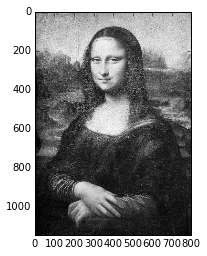

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from PIL import Image

plt.rcParams['figure.figsize'] = (20.0, 20.0)
%matplotlib inline

fname = 'MonaLisaBW.jpg'
image = Image.open(fname).convert("L")
I = np.asarray(image)
plt.imshow(I, cmap = cm.Greys_r)
plt.show()

In [2]:
size_patche = 10

patches = []
for i in np.arange(0,I.shape[0]-size_patche, size_patche):
    for j in np.arange(0,I.shape[1]-size_patche, size_patche): 
        A = I[ i:i+size_patche , j:j+size_patche]
        patches.append(A)
        
print len(patches)
for l in patches:
    if l.shape != (size_patche, size_patche):
        print l.shape




9006


In [3]:
vector_patches = []
for p in patches:
    vector_patches.append( p.reshape(1,size_patche*size_patche) )

In [4]:
# print len(vector_patches)
# print vector_patches[size_patche].shape
# print vector_patches[size_patche]

In [5]:
S = np.zeros( (len(vector_patches), size_patche * size_patche) )
for i in range(0,len(vector_patches)):
    S[i , : ] = vector_patches[i]
    
print S.shape

(9006L, 100L)


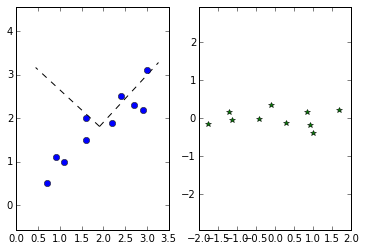

In [6]:
import princomp

#print examples: bellow

In [7]:
X, W, latent = princomp.princomp(S)

In [8]:
print X.shape
print W.T.shape


(100L, 100L)
(9006L, 100L)


(9006L, 100L)
range_j 79
range_i 114
-
(10L, 790L)
 add all rows:
I shape
(1143L, 800L)
I' shape
(1130L, 790L)


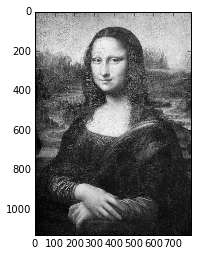

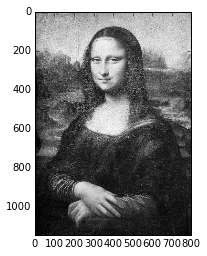

In [9]:
S_prime =  (np.matrix(X) * np.matrix(W )).T

patches_inverse = []

print S_prime.shape

for i in range(0,S_prime.shape[0]):
    patches_inverse.append( S_prime[i,:].reshape(10,10) )
    
range_j = I.shape[1]/ 10 -1
range_i = I.shape[0]/10

print "range_j %s" %range_j
print "range_i %s" %range_i

I_prime = patches_inverse[0]
for j in range(1, range_j):
        I_prime = np.concatenate( (I_prime , patches_inverse[j] ), axis = 1)

print "-"
print I_prime.shape
print " add all rows:"
for i in np.arange( range_j, len(patches_inverse) - range_j , range_j):
    Line = patches_inverse[i]
    for j in range(i+1,i + range_j):
        Line = np.concatenate( (Line , patches_inverse[j]) , axis = 1)
#     print " i' shape %s" % str(I_prime.shape)
#     print " line shape %s" % str(Line.shape)
    I_prime = np.concatenate(( I_prime , Line) , axis = 0 )
        
print "I shape"  
print I.shape
print "I' shape"
print I_prime.shape

plt.imshow( I_prime,  cmap = cm.Greys_r)
plt.show()

plt.imshow(I, cmap = cm.Greys_r)
plt.show()

In [ ]:
S_prime =  (np.matrix(X[ :6 , :]) * np.matrix(W ).T).T

patches_inverse = []

print S_prime.shape

for i in range(0,S_prime.shape[0]):
    patches_inverse.append( S_prime[i,:].reshape(10,10) )
    
range_j = I.shape[1]/ 10 -1
range_i = I.shape[0]/10

print "range_j %s" %range_j
print "range_i %s" %range_i

I_prime = patches_inverse[0]
for j in range(1, range_j):
        I_prime = np.concatenate( (I_prime , patches_inverse[j] ), axis = 1)

print "-"
print I_prime.shape
print " add all rows:"
for i in np.arange( range_j, len(patches_inverse) - range_j , range_j):
    Line = patches_inverse[i]
    for j in range(i+1,i + range_j):
        Line = np.concatenate( (Line , patches_inverse[j]) , axis = 1)
#     print " i' shape %s" % str(I_prime.shape)
#     print " line shape %s" % str(Line.shape)
    I_prime = np.concatenate(( I_prime , Line) , axis = 0 )
        
print "I shape"  
print I.shape
print "I' shape"
print I_prime.shape

plt.imshow( I_prime,  cmap = cm.Greys_r)
plt.show()

plt.imshow(I, cmap = cm.Greys_r)
plt.show()